# COGS 118A - Assignment 1: KNN



The goal of this assignment is to be able to use Python to build a KNN model that is suitable for a given classification task. 

#### Part 1.  
Build a KNN to do handwritten digits prediction. The data consists of grey scale images of handwritten digits. Each image is a set of pixels stored as a vector. 

In [1]:

from sklearn.datasets import load_digits, load_wine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
%matplotlib inline

Load the MNIST dataset. (Can take up to 3 minutes.) `x` stores the images and `y` stores the labels. For an image i, $x_{i}$ is a vector of its pixel values, and $y_{i}$ is its label. $y_{i} \in [1,2,3,4,5,6,7,8,9,0] $ .

In [2]:
mnist = sklearn.datasets.fetch_openml('mnist_784')
x = mnist.data.to_numpy(dtype= np.int64)
y = mnist.target.to_numpy(dtype= np.int64)


Separate training and testing data randomly.

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x[:2500], y[:2500], test_size=0.2, random_state=123, stratify=y[:2500])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(2000, 784)
(500, 784)
(2000,)
(500,)


#### 1.1 (5 points)

For convinence, we have created a class object `knn` for storing our KNN model. Please fill in the missing instance methods. You are free to modify the input parameters. Make sure your code outputs the responses our questions ask for. 

Instance method `fit` is the training process. For KNN it is simply storing the training dataset.

Instance method `distance` is a function that takes in two vectors (samples of data) and returns the distance between the two vectors. (1.5 points)

Hint: Try your best to avoid using for loops in `self.distance`. Or it would take too long for KNN to compute. 

Instance method `predict` uses KNN method to predict a given set of digit images. If the input is a N by d dimensional matrix, where d is the number of features and N is the number of samples, the output should be an N dimensional vector. (3 points)

Hint: Here are some useful numpy functions to help you achieve your goal: np.square, np.sqrt, np.zeros, np.ones, np.argsort, np.bincount, np.linalg.norm, np.dot, np.equal,np.mean, np.argmax 

Instance method `score` produces the accuracy of the KNN model when running on a test dataset. Accuracy is the precentage of the test data that is correctly classified. (Hint: you will first need to call `self.predict` to label the input test data.) (0.5 points)


In [20]:
class knn:
	def __init__(self, k):
		self.k = k
		self.X_train = None
		self.Y_train = None

	def fit(self, X, Y):
		self.X_train = X
		self.Y_train = Y

	def distance(self, x1, x2):

		# returns the distance between two vectors
		# the distance is the L2 norm
		# your solution here  
		# problem 1.1.1 , 1.5 points
		if x1.shape != x2.shape:
			raise ValueError('vectors must be of the same shape')
		#x1, x2 = np.linalg.norm(x1, x2)
		normed_difference_vec = np.sqrt(np.square((x1 - x2)))
		ones = np.ones(x1.shape)
		distance = np.dot(normed_difference_vec, ones)
		return distance 
	
	
	def predict(self, x_test):
		# returns the predictions for multiple examples X
		# your solution here
		# problem 1.1.2 , 3 points
		predictions = []
		for i in np.array(x_test): 
			distances = [self.distance(i, x) for x in self.X_train ]
			k_nearest_indices = np.argsort(distances)[:self.k]
			#print(f"k_nearest_indices:{k_nearest_indices}")
			k_nearest_labels = self.Y_train[k_nearest_indices]
			#print(f"k_nearest_labels.shape: {k_nearest_labels.shape}")
			#print(f"Y_train.shape: {self.Y_train.shape}")
			prediction  = np.bincount(k_nearest_labels).argmax()
			predictions.append(prediction)

		return predictions

	def score(self, x_test, y_test):
		# Return the accuracy of your model on the test data.
		# problem 1.1.3, 0.5 point
		
		predictions = self.predict(x_test)
		print(f"predictions:{predictions}")
		accuracy_mask = np.equal(predictions, y_test)
		score = np.mean(accuracy_mask)

		return score 
	
	def training_accuracy(self, x_train, y_train): 
		predictions = self.predict(x_train)
		accuracy_mask = np.equal(predictions, y_train)
		accuracy = np.mean(accuracy_mask)

		return accuracy

		
				


		

Compare the accuracy using our KNN model with the accuracy using Sklearn KNN to see if we have implemented correctly. The two accuracy scores should be fairly close.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
sklearn_knn = KNeighborsClassifier(n_neighbors = 5)
sklearn_knn.fit(X_train, Y_train)
sklearn_knn_score = sklearn_knn.score(X_test, Y_test)
print("sklearn_knn_score:", sklearn_knn_score)

our_knn = knn(k = 5)
our_knn.fit(X_train, Y_train)
our_knn_score = our_knn.score(X_test, Y_test)
print("our_knn_score:", our_knn_score)


sklearn_knn_score: 0.912
predictions:[0, 8, 6, 4, 4, 5, 1, 5, 1, 1, 7, 0, 4, 1, 0, 9, 3, 7, 5, 6, 7, 6, 1, 0, 6, 7, 4, 9, 2, 7, 1, 9, 3, 3, 8, 5, 1, 3, 5, 9, 2, 5, 0, 1, 6, 0, 4, 7, 0, 3, 3, 9, 2, 7, 7, 9, 1, 6, 8, 3, 8, 7, 9, 6, 8, 3, 9, 7, 3, 9, 2, 8, 7, 2, 3, 8, 9, 8, 7, 1, 7, 4, 1, 1, 9, 4, 0, 8, 7, 7, 8, 8, 5, 9, 8, 1, 0, 8, 2, 7, 0, 4, 1, 7, 5, 1, 2, 8, 1, 4, 8, 1, 6, 6, 3, 4, 5, 2, 1, 6, 6, 5, 7, 4, 1, 5, 0, 5, 5, 9, 9, 1, 5, 8, 4, 5, 6, 3, 7, 3, 1, 7, 4, 2, 7, 4, 3, 2, 4, 2, 1, 9, 4, 9, 1, 4, 0, 9, 1, 6, 8, 6, 1, 9, 1, 7, 5, 6, 1, 0, 7, 1, 3, 3, 6, 4, 0, 0, 5, 7, 3, 6, 2, 0, 5, 4, 6, 1, 1, 0, 7, 3, 5, 7, 7, 7, 9, 1, 2, 9, 0, 1, 8, 2, 7, 6, 6, 5, 0, 9, 6, 8, 2, 5, 4, 3, 2, 1, 8, 1, 3, 3, 7, 7, 6, 9, 5, 2, 7, 1, 0, 8, 4, 3, 9, 1, 0, 5, 3, 3, 9, 1, 9, 2, 4, 0, 5, 0, 1, 5, 7, 4, 3, 2, 0, 4, 9, 1, 1, 3, 6, 4, 7, 6, 2, 0, 6, 9, 4, 1, 1, 0, 1, 9, 1, 7, 8, 4, 8, 3, 4, 6, 4, 2, 6, 9, 0, 1, 3, 8, 3, 5, 4, 7, 5, 0, 1, 4, 0, 2, 1, 2, 5, 4, 5, 7, 1, 6, 9, 0, 0, 4, 2, 4, 6, 0, 0, 3, 0, 4, 9,

Let's visualize the images that are being misclassifed and compare that to the ones that are correctly classifed. This will help us to see the potential problems of our model. You can change the code below to see more images.

In [6]:
Y_pred = our_knn.predict(X_test)

incorrect = [i for i, x in enumerate(Y_pred!=Y_test) if x]
correct = [i for i, x in enumerate(Y_pred==Y_test) if x]

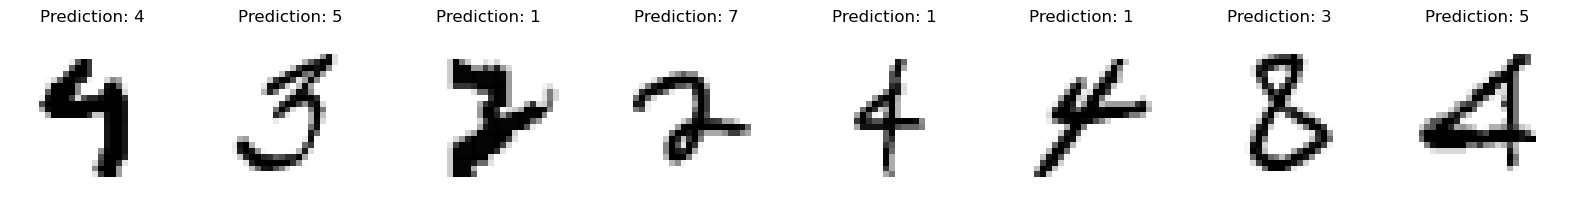

In [7]:
NUM_OF_IMAGES = 8 # number of images to display
_, axes = plt.subplots(nrows=1, ncols=NUM_OF_IMAGES, figsize=(20, 20))
START = 0 # start index of the images to display
for ax, ind in zip(axes, list(range(START,START+NUM_OF_IMAGES))):
    ax.set_axis_off()
    image = X_test[incorrect[ind]].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {Y_pred[incorrect[ind]]}")


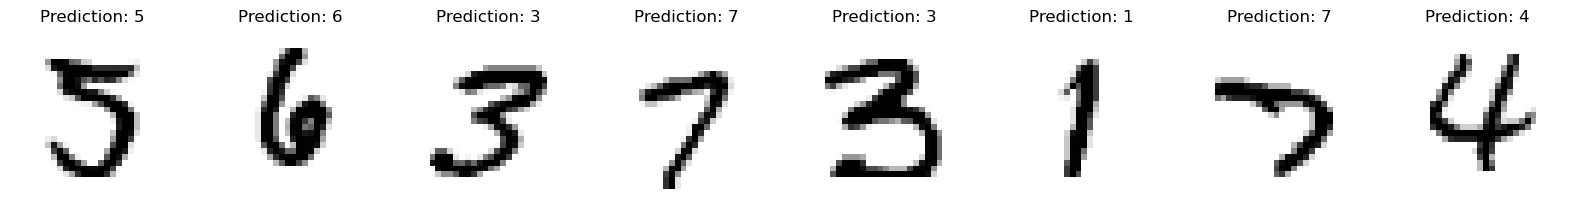

In [8]:

_, axes = plt.subplots(nrows=1, ncols=NUM_OF_IMAGES, figsize=(20, 20))
START = 120 # start index of the images to display
for ax, ind in zip(axes, list(range(START,START+NUM_OF_IMAGES))):
    ax.set_axis_off()
    image = X_test[correct[ind]].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {Y_pred[correct[ind]]}")

#### 1.2 (4 points)


Test the training and test accuracy using any sets of k values ($k \in \mathbb{Z}^{+}$, at least 5 k values in your set)  and plot the results with the x axis as the values of the k values you picked and the y axis as the accuracies. 
You can plot it on two seperate graphs or on the same one. Make sure clearly label which one is for the training accuracy and which one is for the test accuracy. The type of graph you choose has to clearly indicate the trend you observe.

Good time to grab a coffee if it takes too long to run. 

NOTE: Use the KNN model you built for this task. For generating training accuracy, you can add a new method similar to the `score` method but outputs training accuracy instead of test. 


Plot(s) (2 point)

**Answer the below questions**

What is the trend of your plot?        (1 point) <br/>
Answer: 

Which k value produces the optimal results? (Which k produces the highest test accuracy?)    (1 point)<br/>
Answer: 


X_train.shape: (2000, 784)
predictions:[0, 8, 6, 4, 4, 3, 7, 5, 1, 1, 7, 0, 4, 1, 0, 9, 3, 7, 5, 6, 7, 6, 1, 0, 6, 7, 4, 9, 2, 7, 1, 9, 8, 3, 8, 5, 1, 3, 5, 9, 2, 4, 0, 1, 6, 0, 4, 7, 0, 3, 3, 9, 2, 7, 7, 9, 1, 6, 8, 3, 8, 7, 9, 6, 8, 3, 9, 7, 3, 9, 2, 8, 7, 2, 2, 8, 9, 8, 7, 1, 7, 9, 1, 1, 9, 4, 2, 8, 7, 7, 8, 3, 5, 9, 8, 1, 0, 8, 2, 7, 0, 4, 1, 7, 5, 1, 2, 8, 4, 4, 8, 1, 6, 6, 3, 4, 5, 2, 1, 6, 6, 5, 7, 4, 1, 5, 0, 5, 5, 9, 9, 1, 5, 8, 9, 3, 6, 3, 7, 3, 1, 7, 4, 2, 7, 4, 3, 2, 4, 2, 1, 9, 4, 9, 1, 4, 0, 9, 2, 6, 8, 6, 9, 9, 1, 7, 5, 6, 1, 0, 7, 1, 3, 3, 6, 4, 0, 0, 5, 7, 3, 6, 2, 0, 5, 4, 6, 1, 1, 0, 7, 3, 5, 7, 7, 7, 7, 1, 2, 9, 0, 1, 8, 2, 9, 6, 6, 5, 0, 9, 6, 8, 2, 5, 4, 3, 2, 1, 8, 1, 3, 3, 7, 7, 6, 9, 5, 2, 7, 1, 0, 8, 4, 3, 9, 1, 0, 5, 3, 3, 9, 1, 9, 2, 9, 0, 5, 0, 1, 5, 7, 4, 3, 2, 0, 4, 9, 1, 1, 3, 6, 9, 7, 6, 2, 0, 6, 9, 4, 1, 1, 0, 1, 9, 1, 7, 8, 4, 9, 3, 4, 6, 4, 4, 6, 7, 0, 1, 3, 8, 3, 5, 4, 7, 5, 0, 2, 4, 0, 2, 1, 2, 5, 4, 5, 7, 1, 6, 7, 0, 0, 4, 2, 4, 6, 0, 0, 3, 6, 4, 

([<matplotlib.axis.XTick at 0x21573247808>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

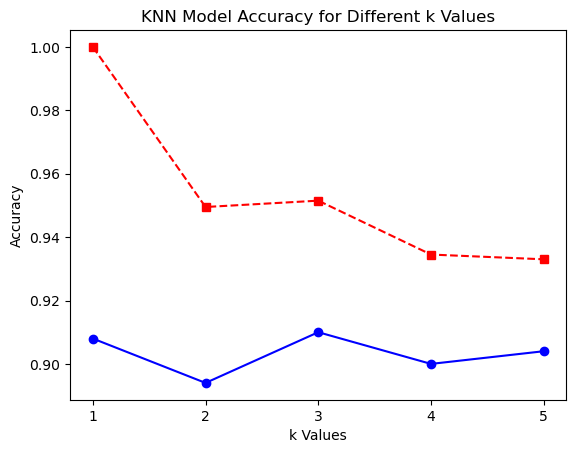

In [9]:
# Code for plots (2 points as mentioned above)
k_vals = [1, 2, 3, 4, 5]

def k_tuning(k_vals, X_test, X_train, Y_test, Y_train): 
    test_accuracies = []
    train_accuracies = []
    for k in k_vals: 
        model = knn(k)
        model.fit(X_train, Y_train)
        #print(f"X_train.shape: {X_train.shape}")
        test_accuracy = model.score(X_test, Y_test)
        train_accuracy = model.training_accuracy(X_train, Y_train)
        test_accuracies.append(test_accuracy)
        train_accuracies.append(train_accuracy)

    return test_accuracies, train_accuracies

accuracies = k_tuning(k_vals, X_test, X_train, Y_test, Y_train)
test_accuracies, train_accuracies = accuracies 

plt.plot(k_vals, test_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.plot(k_vals, train_accuracies, marker='s', linestyle='--', color='r', label='Train Accuracy')
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy for Different k Values')
plt.xticks(k_vals)



In [11]:


test_accuracies, train_accuracies = accuracies 

test_data = zip(enumerate(test_accuracies))
train_data = zip(enumerate(train_accuracies))

print(list(test_data), list(train_data))

[((0, 0.908),), ((1, 0.894),), ((2, 0.91),), ((3, 0.9),), ((4, 0.904),)] [((0, 1.0),), ((1, 0.9495),), ((2, 0.9515),), ((3, 0.9345),), ((4, 0.933),)]


#### 1.3 (5 points)

Choose one other distance function from below or create your own distance function. Below is a list of distance functions that you could try. You can use the optimal k-value from Q1.2; however, in real world, we would need to find the optimal k value again with the new distance function. Create a new `knn` class if you need to, but necessary. 

1. Manhattan Distance 
2. Cosine Distance 
3. L-Infinity norm 


In [29]:
"""
You can use built-in Numpy methods to implement your distance forumla but be sure to understand what equations those methods are using. 
"""
# Write the Python implementation here (1.5 points)

class manhattan_knn:
	def __init__(self, k):
		self.k = k
		self.X_train = None
		self.Y_train = None

	def fit(self, X, Y):
		self.X_train = X
		self.Y_train = Y

	def distance(self, x1, x2):

		# returns the distance between two vectors
		# the distance is the L2 norm
		# your solution here  
		# problem 1.1.1 , 1.5 points
		return np.sum(np.abs(np.array(x1)-np.array(x2)))

	
	def predict(self, x_test):
		# returns the predictions for multiple examples X
		# your solution here
		# problem 1.1.2 , 3 points
		predictions = []
		for i in np.array(x_test): 
			distances = [self.distance(i, x) for x in self.X_train ]
			k_nearest_indices = np.argsort(distances)[:self.k]
			#print(f"k_nearest_indices:{k_nearest_indices}")
			k_nearest_labels = self.Y_train[k_nearest_indices]
			#print(f"k_nearest_labels.shape: {k_nearest_labels.shape}")
			#print(f"Y_train.shape: {self.Y_train.shape}")
			prediction  = np.bincount(k_nearest_labels).argmax()
			predictions.append(prediction)

		return predictions

	def score(self, x_test, y_test):
		# Return the accuracy of your model on the test data.
		# problem 1.1.3, 0.5 point
		
		predictions = self.predict(x_test)
		print(f"predictions:{predictions}")
		accuracy_mask = np.equal(predictions, y_test)
		score = np.mean(accuracy_mask)

		return score 
	
	def training_accuracy(self, x_train, y_train): 
		predictions = self.predict(x_train)
		accuracy_mask = np.equal(predictions, y_train)
		accuracy = np.mean(accuracy_mask)

		return accuracy

		
				

    


**Write answers to the below questions**

What is your distance function? Write down the distance equation. (0.5 point)<br/>
Answer: Σ|x1-x2|

Describe issues with using the L2 norm: (2 points)<br/>
Answer:  The L2 norm is not generalizable to higher dimensional space. In the context of KNN it means our model will perform worse (at least insofar as regards our distance metric) with the addition of new features. I read about this here: https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions

What do you think is the reason your distance function performs better, worse, or similar than L2 norm? (1 points)<br/>
Answer: According to the people on stack exchange, for Lk norms, as k increases the norm is less generalizable to higher dimensional space. Because of this I woudl expect for their to not be a huge difference between Manahttan and Euclidian distance on this dataset, but for a model with a greater number of features I would expect Manhattan to be better. 




### Problem 2

In this problem , we will be using the wine classfication dataset. Before opimizing our KNN model, it is imperative to understand the properties of our dataset.

More information about the dataset is linked below:

https://archive.ics.uci.edu/ml/datasets/wine

In [13]:
wine = load_wine()
X = wine.data
print(X.shape)
Y = wine.target
print(Y.shape)
print("feature names:", wine.feature_names)
print("target names:", wine.target_names)

(178, 13)
(178,)
feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target names: ['class_0' 'class_1' 'class_2']


#### 2.1  (3 points)

Now, let’s classify the wine dataset using our KNN with the L2 norm as the distance function. Choose the optimal k value for this task and record your approach.

You might need to change the k value a couple of times to find the one with the highest average test accuracy. Feel free to add a for loop. 

Since we have limited data, we can use K-folds to assess the performance of our model more accurately. 

Note: KFold is a tool from Sklearn that helps you prepare your data for k-fold cross-validation (I know, the letter k is a little overused... K-fold, K-NN, K-means...) This line of code creates an instance of the tool with k, the number of folds, equals 5, which means each fold is 1/5 the size of the entire dataset. For each fold, we take the fold as the test set and the rest as the training set. When `n_splits` = 5, we will " train" the KNN 5 times and "test" it 5 times. Exactly which sample goes into which fold is random. (parameter `shuffle = True`) 
Link to documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

For each k value, store accuracy of each test in a list so we can take the average of the accuracy scores. Each list should be `n_splits` long. Use the averages to determine the optimal k value.

NOTE: Use the KNN model you built for this task.


In [21]:

kf = KFold(n_splits=5, shuffle=True, random_state=123) # Do not change the arguments. 


avg_accuracies = []


for k in k_vals:
    fold_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = knn(k)
        model.fit(X_train, y_train)
        
        accuracy = model.score(X_test, y_test)
        fold_accuracies.append(accuracy)
    
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)

optimal_k = k_vals[np.argmax(avg_accuracies)]
optimal_accuracy = max(avg_accuracies)

print(f'Optimal k value: {optimal_k}')
print(f'Average accuracy with optimal k: {optimal_accuracy}')

predictions:[1, 7, 1, 3, 0, 7, 0, 7, 5, 4, 4, 4, 7, 3, 9, 2, 5, 6, 4, 7, 6, 4, 6, 7, 0, 6, 0, 0, 7, 3, 6, 5, 7, 3, 3, 3]
predictions:[9, 0, 2, 4, 3, 9, 6, 5, 3, 9, 4, 3, 3, 0, 0, 4, 7, 2, 7, 2, 4, 2, 0, 2, 9, 1, 7, 7, 7, 7, 8, 1, 9, 9, 2, 7]
predictions:[3, 3, 1, 1, 7, 3, 1, 7, 1, 1, 6, 9, 9, 9, 8, 2, 6, 1, 5, 9, 2, 8, 4, 1, 8, 7, 6, 5, 9, 1, 7, 2, 9, 6, 8, 6]
predictions:[1, 3, 8, 3, 7, 5, 4, 7, 5, 6, 5, 5, 3, 2, 1, 3, 1, 1, 0, 6, 2, 0, 0, 0, 1, 3, 8, 4, 9, 7, 1, 3, 6, 1, 2]
predictions:[4, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 9, 8, 4, 9, 3, 1, 4, 8, 0, 1, 5, 1, 8, 8, 8, 1, 9, 4, 4, 8, 1, 7, 2, 9]
predictions:[1, 7, 1, 2, 0, 7, 0, 2, 5, 4, 4, 4, 0, 3, 0, 2, 0, 1, 2, 3, 0, 4, 0, 7, 0, 4, 0, 0, 6, 1, 4, 1, 6, 2, 3, 3]
predictions:[8, 0, 2, 0, 3, 5, 0, 1, 3, 8, 3, 3, 3, 0, 0, 4, 7, 2, 7, 2, 1, 2, 0, 2, 7, 1, 6, 1, 7, 0, 6, 1, 5, 1, 2, 5]
predictions:[3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 3, 1, 2, 6, 1, 3, 4, 2, 1, 4, 1, 4, 7, 3, 5, 4, 1, 0, 1, 9, 6, 4, 1]
predictions:[1, 3, 3, 3, 7, 5, 4, 7, 4


#### 2.2 (4 points)
Again, we would like to change our distance function to best fit our classification problem. Choose a distance function from what we have listed. It can be the same one from problem 1.3 . Set k equal to the optimal k value you have found.


(It is okay if the new distance function performs worse than using the L2 norm. You just need to write the new distance function and apply KNN to the dataset.)

In [22]:
# Python implementation (1.5 points)
# You can keep the code you wrote for testing the new distance function. 

for k in k_vals:
    fold_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        knn = manhattan_knn(k=k)
        knn.fit(X_train, y_train)
        
        accuracy = knn.score(X_test, y_test)
        fold_accuracies.append(accuracy)
    
    avg_accuracy = np.mean(fold_accuracies)
    avg_accuracies.append(avg_accuracy)

optimal_k = k_vals[np.argmax(avg_accuracies)]
optimal_accuracy = max(avg_accuracies)

print(f'Optimal k value: {optimal_k}')
print(f'Average accuracy with optimal k: {optimal_accuracy}')

predictions:[1, 7, 1, 3, 0, 7, 0, 7, 5, 4, 4, 4, 7, 3, 9, 2, 5, 6, 4, 7, 6, 4, 6, 7, 0, 6, 0, 0, 7, 3, 6, 5, 7, 3, 3, 3]
predictions:[9, 0, 2, 4, 3, 9, 6, 5, 3, 9, 4, 3, 3, 0, 0, 4, 7, 2, 7, 2, 4, 2, 0, 2, 9, 1, 7, 7, 7, 7, 8, 1, 9, 9, 2, 7]
predictions:[3, 3, 1, 1, 7, 3, 1, 7, 1, 1, 6, 9, 9, 9, 8, 2, 6, 1, 5, 9, 2, 8, 4, 1, 8, 7, 6, 5, 9, 1, 7, 2, 9, 6, 8, 6]
predictions:[1, 3, 8, 3, 7, 5, 4, 7, 5, 6, 5, 5, 3, 2, 1, 3, 1, 1, 0, 6, 2, 0, 0, 0, 1, 3, 8, 4, 9, 7, 1, 3, 6, 1, 2]
predictions:[4, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 9, 8, 4, 9, 3, 1, 4, 8, 0, 1, 5, 1, 8, 8, 8, 1, 9, 4, 4, 8, 1, 7, 2, 9]
predictions:[1, 7, 1, 2, 0, 7, 0, 2, 5, 4, 4, 4, 0, 3, 0, 2, 0, 1, 2, 3, 0, 4, 0, 7, 0, 4, 0, 0, 6, 1, 4, 1, 6, 2, 3, 3]
predictions:[8, 0, 2, 0, 3, 5, 0, 1, 3, 8, 3, 3, 3, 0, 0, 4, 7, 2, 7, 2, 1, 2, 0, 2, 7, 1, 6, 1, 7, 0, 6, 1, 5, 1, 2, 5]
predictions:[3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 3, 1, 2, 6, 1, 3, 4, 2, 1, 4, 1, 4, 7, 3, 5, 4, 1, 0, 1, 9, 6, 4, 1]
predictions:[1, 3, 3, 3, 7, 5, 4, 7, 4



**Write answers to the below questions**

What is your distance function? Write down the distance equation. (0.5 point)<br/>
Answer: Manhattan Distance 

What do you think is the reason your distance function performs better or worse than the L2 norm? (2 points)<br/>
Answer: This dataset has 13 dimensions and the L1 norm should perform better than the L2 norm according to the mathematics stack exchange people so I think manhattan distance is the way to go. 

#### 2.3 (3 points)

We can further improve the accuracy of our model by normalizing the dataset.  

Data can be normalized using the following equation:

$$ x_{ij}^{normalized} = \frac{x_{ij} -\mu_{j}}{\sigma_{j}} $$
Where $x_{ij}$ is the value of feature j of sample i, 

$\mu_{j} $ and $\sigma_{j}$ are the mean and the standard deviation of feature j.

Normalize the wine dataset and apply your KNN model (with your favorite k value and distance function) on the normalized dataset. 

Print the new average test accuracy score after performing k-fold cross-validation. 

In [32]:
# YOUR CODE HERE:

def normalize_data(data): 
    standard_devs = []
    means = []
    for col in range(data.shape[1]):
        standard_dev = np.std(data[:, col])
        standard_devs.append(standard_dev)
        mean = np.mean(data[:, col])
        means.append(mean)
    
    norms = np.zeros(data.shape)
    for i in range(data.shape[0]): 
        for j in range(data.shape[1]):
            norm = (data[i, j] - means[j]) / standard_devs[j]
            norms[i, j] = norm
    return norms

normed_data = normalize_data(X)

last_model = manhattan_knn(4)
last_model.fit(normed_data, Y)
predictions = last_model.predict(normed_data)
last_model.score(predictions, Y)


predictions:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


0.33146067415730335

### 2.4 (1 Point)
Why do you think normalization can make a large improvement to our classification accuracy? 


Putting every feature in the same scale makes it so that they are all equally weighted. Otherwise a feature with the scale 0-1000 would be weighed more than a feature with the scale 0-1. THis is especailly true because we are using distance metrics in our model, where scale is very important. 